## <span style="color:blue">  Numerical exercises 6</span>

Uno dei modelli più studiati in fisica statistica è il modello di Ising di spins interagenti su di un reticolo. Il modello può essere usato per sumulare le proprietà di un magnete. Consideriamo pertanto un modello di Ising 1D, gli spins possono assure solamente due valori $s_i=\pm 1$ per $1\leq i\leq N$ con N, numero di siti reticolari. L'energia totale del sistema sarà data da $$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$
con $J>0$ (ferromagnetic model), e con l'assunzione che $s_{N+1} = s_{1}$.<p>
La funzione di partizione per tale sistema è calcolabile analiticamente e vale:
$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$
Dove
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and dove $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
<p>
Vogliamo quindi campionare mediante l'Algoritmo di Metropoli la probabilità per il nostro sistema a $N$ spins in 1D a temperatura $T=1/\beta$ la distribuzione di probabilità:$$p(s_i,\dots,s_N)=\frac{1}{Z}e^{-\beta H(s_1,\dots,s_N)}$$ definita sullo spazio $\{s_1,\dots,s_N),s_1=\pm 1\}$ contente $2^N$ configurazioni possibili di spins.

L'algoritmo pertanto si presenta nella seguente maniera:<p>
$\textbf{Inizializzazione}$:Si sceglie una configurazione degli spin arbitraria per lo stato inziale $\textbf{s}_{0}$. Nel caso in esame si è scelto di generare spin orientati in maniera random.<p>
$\textbf{Trial}$: Si propone una mossa $\textbf{s}_0\rightarrow \textbf{s}_{trial}$, scegliendo in maniera random di flippare uno spin<p>
$\textbf{Accettazione}$: Se si è scelto di flippare il $j$ th spin, si ha che $\textbf{s}_0=(s_1,\dots,s_j,\dots,s_N)$ e $\textbf{s}_{trial}=(s_1,\dots,-s_j,\dots,s_N)$<n>
Avendo assunto una $T(\textbf{s}_{trial}|\textbf{s}_0)$ uniforme si avrà che:$$w=q(\textbf{s}_{trial}|\textbf{s}_0)=\frac{p(\textbf{s}_{trial})}{p(\textbf{s}_0)}=e^{-\beta[H(\textbf{s}_{trial})-H(\textbf{s}_{0})]}=e^{(-2\beta Bs_j-2\beta J s_j(s_{j-1}+s_{j+1}))}$$
    Si genera allora un numero random $r\in(0,1)$ e se $r\leq w$, si accetta la mossa, definendo $\textbf{s}_1=\textbf{s}_{trial}$, altrimenti si rifiuta definendo $\textbf{s}_1=\textbf{s}_{0}$<p>
 $\textbf{Iterazione}$: Si usa $\textbf{s}_1$ come il nuovo punto inziale e si rincomincia.<p>
In genere, ad alte temperature l'accetazione è vicina a 1 perchè $\beta$ è piccolo e quindi l'algoritmo è abbastanza efficiente. Tuttavia a più basse temperature diventa sempre più difficile flippare lo spin e l'algoritmo risulta essere meno efficiente.Un modo per evitare tutto ciò è campionamento di Gibbs, ovvero l'Heat-Bath algorithm.<n>
Si tratta anch'esso di un algoritmo a singolo spin-flip, ma è più efficiente nel trovare stati energeticamente favorevoli di spins.<n>
    In particolare, nel nostro caso specifico, si estrae in maniera random uno spin e si propone un nuovo valore per esso (indipendentemente dal valore che ha al momento) a partire dalla distribuzione di probabilità consizionale definita da tutti gli altri spins:$$p(s'_k=\pm 1|\{s_j:j\neq k\})=\frac{1}{1+e^{-\beta \Delta E_{s_k=\mp 1\rightarrow s_k=\pm1}}}$$ Tali probabilità di transizione una volta calcolate permettono di campionare $s_k$ accettando sempre la mossa proposta. <p>
    Quindi computazionalmente si tratta di valutare la probabilità condizionata, estrarre un numero $r\in[0,1)$ e se $r<p(s'_k=\pm 1|\{s_j:j\neq k\})$ flippare lo spin.<p>
   Una problematica importante è l'**equilibrazione**: occore infatti non considerare i primi passi della catena di Markov, quando ancora la sua distribuzione di Markov campionata non ha raggiunto la sua probabilità limite.
    


### Exercise 06.1

Complete the C++ code to simulate 1D Ising model (It is available on the Ariel web site of this Laboratory) with 
- the Metropolis sampling algorithm and
- the Gibbs sampling algorithm

to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$,
adding also the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

Si è proceduto dapprima all'equilibrazione del sistema, in particolare si è svolta una prima simulazione con $N=100$ blocchi e si è salvata la configurazione finale del sistema così come il seed del generatore Random.<p>
    Di seguito si riportano i grafici dell'equilibrazione per $T=0.5$ e $h=0$ per $U(N,T)$, $C(N,T)$, $\chi(N,T)$ e $M(N,T,h=0.02)$ in funzione del numero di blocchi.

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import math
import matplotlib.gridspec as gridspec


blk,u_blk = np.loadtxt("Es6/Instant_Conf/Metro_instant_T50_h0_Equilibration.0", usecols=(0,1), delimiter='\t', unpack='true')
c_blk = np.loadtxt("Es6/Instant_Conf/Metro_instant_T50_h0_Equilibration.0", usecols=(2), delimiter='\t', unpack='true')
x_blk = np.loadtxt("Es6/Instant_Conf/Metro_instant_T50_h0_Equilibration.0", usecols=(3), delimiter='\t', unpack='true')
m_blk = np.loadtxt("Es6/Instant_Conf/Metro_instant_T50_h2_Equilibration.0", usecols=(4), delimiter='\t', unpack='true')


G = gridspec.GridSpec(2,2)
f = plt.figure(figsize=(12,15))
f.subplots_adjust(hspace=0.4, wspace=0.4)


fig_1=plt.subplot(G[0, 0])
fig_1.scatter(blk,u_blk)
fig_1.set_title('T=0.5 h=0',fontsize='x-large')
fig_1.set_xlabel('#Blocks',fontsize='x-large')
fig_1.set_ylabel(r'$U(N,T)$',fontsize='x-large')
fig_1.grid(True)

fig_2=plt.subplot(G[0, 1])
fig_2.scatter(blk,c_blk)
fig_2.set_title('T=0.5 h=0',fontsize='x-large')
fig_2.set_xlabel('#Blocks',fontsize='x-large')
fig_2.set_ylabel(r'$C(N,T)$',fontsize='x-large')
fig_2.grid(True)

fig_3=plt.subplot(G[1, 0])
fig_3.scatter(blk,x_blk)
fig_3.set_title('T=0.5 h=0',fontsize='x-large')
fig_3.set_xlabel('#Blocks',fontsize='x-large')
fig_3.set_ylabel(r'$\chi(N,T)$',fontsize='x-large')
fig_3.set_ylim([72,82])
fig_3.grid(True)

fig_4=plt.subplot(G[1, 1])
fig_4.scatter(blk,m_blk)
fig_4.set_title('T=0.5 h=0.02',fontsize='x-large')
fig_4.set_xlabel('#Blocks',fontsize='x-large')
fig_4.set_ylabel(r'$M(N,T,h=0.02)$',fontsize='x-large')
fig_4.grid(True)



Si nota come il sistema dopo il $40'$ blocco si raggiunge l'equilibrio; a questo punto è possibile misurare le quantità macroscopiche d'interesse. Per far questo si sono utilizzato $N=200$ blocchi e $M=10^4$ step per blocco. Nei grafici seguenti sono riportati i valori delle osservabili termodinamiche in funzione della temperatura sia per un campionamento Metropolis che di Gibbs.

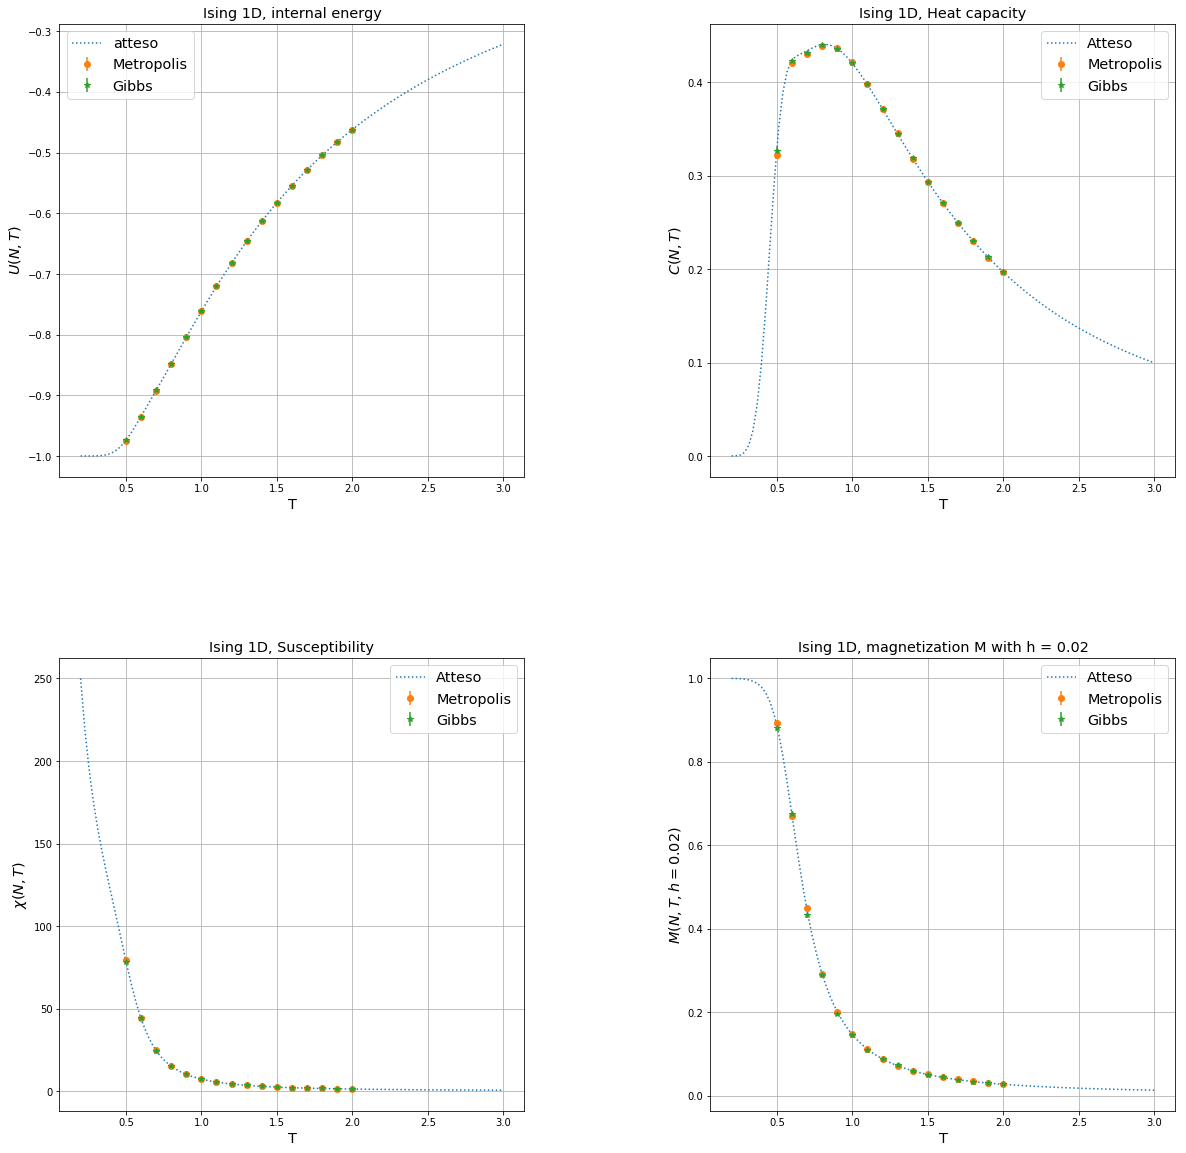

In [3]:
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)


Temp_u,u, Err_u = np.loadtxt("Es6/Result/Metro_ave.ene.dat", usecols=(0,2,3), delimiter='\t', unpack='true')
Temp_c,c, Err_c = np.loadtxt("Es6/Result/Metro_ave.heat.dat", usecols=(0,2,3), delimiter='\t', unpack='true')
Temp_x,x, Err_x = np.loadtxt("Es6/Result/Metro_ave.sus.dat", usecols=(0,2,3), delimiter='\t', unpack='true')
Temp_m,m_n, Err_m = np.loadtxt("Es6/Result/Metro_ave.mag.dat", usecols=(0,2,3), delimiter='\t', unpack='true')

Temp_ug,ug, Err_ug = np.loadtxt("Es6/Result/Gibbs_ave.ene.dat", usecols=(0,2,3), delimiter='\t', unpack='true')
Temp_cg,cg, Err_cg = np.loadtxt("Es6/Result/Gibbs_ave.heat.dat", usecols=(0,2,3), delimiter='\t', unpack='true')
Temp_xg,xg, Err_xg = np.loadtxt("Es6/Result/Gibbs_ave.sus.dat", usecols=(0,2,3), delimiter='\t', unpack='true')
Temp_mg,m_ng, Err_mg = np.loadtxt("Es6/Result/Gibbs_ave.mag.dat", usecols=(0,2,3), delimiter='\t', unpack='true')


G = gridspec.GridSpec(2,2)
f = plt.figure(figsize=(20,20))
f.subplots_adjust(hspace=0.4, wspace=0.4)


fig_1=plt.subplot(G[0, 0])
fig_1.plot(T, e,linestyle=":",label="atteso")
fig_1.errorbar(Temp_u,u,yerr=Err_u, linestyle="None",marker='o',label="Metropolis")
fig_1.errorbar(Temp_ug,ug,yerr=Err_ug, linestyle="None",marker='*',label="Gibbs")
fig_1.set_title('T=0.5 h=0',fontsize='x-large')
fig_1.set_xlabel('T',fontsize='x-large')
fig_1.set_ylabel(r'$U(N,T)$',fontsize='x-large')
fig_1.set_title('Ising 1D, internal energy',fontsize='x-large')
fig_1.legend(fontsize='x-large')
fig_1.grid(True)

fig_2=plt.subplot(G[0, 1])
fig_2.plot(T,heat,linestyle=":",label="Atteso")
fig_2.errorbar(Temp_c,c,yerr=Err_c, linestyle="None",marker='o',label="Metropolis")
fig_2.errorbar(Temp_cg,cg,yerr=Err_cg, linestyle="None",marker='*',label="Gibbs")
fig_2.set_title('Ising 1D, Heat capacity',fontsize='x-large')
fig_2.set_xlabel('T',fontsize='x-large')
fig_2.set_ylabel(r'$C(N,T)$',fontsize='x-large')
fig_2.legend(fontsize='x-large')
fig_2.grid(True)

fig_3=plt.subplot(G[1, 0])
fig_3.plot(T,X,linestyle=":",label="Atteso")
fig_3.errorbar(Temp_x,x,yerr=Err_x, linestyle="None",marker='o',label="Metropolis")
fig_3.errorbar(Temp_xg,xg,yerr=Err_xg, linestyle="None",marker='*',label="Gibbs")
fig_3.set_title('Ising 1D, Susceptibility',fontsize='x-large')
fig_3.set_xlabel('T',fontsize='x-large')
fig_3.set_ylabel(r'$\chi(N,T)$',fontsize='x-large')
fig_3.legend(fontsize='x-large')
fig_3.grid(True)

fig_4=plt.subplot(G[1, 1])
fig_4.plot(T,M,linestyle=":",label="Atteso")
fig_4.errorbar(Temp_m,m_n,yerr=Err_m, linestyle="None",marker='o',label="Metropolis")
fig_4.errorbar(Temp_mg,m_ng,yerr=Err_mg, linestyle="None",marker='*',label="Gibbs")
fig_4.set_title('Ising 1D, magnetization M with h = 0.02',fontsize='x-large')
fig_4.set_xlabel('T',fontsize='x-large')
fig_4.set_ylabel(r'$M(N,T,h=0.02)$',fontsize='x-large')
fig_4.legend(fontsize='x-large')
fig_4.grid(True)



Dai grafici si nota un buon accordo per le quantità termodinamiche ricavate a partire dalle simulazione (metodo di Metropolis e di Gibbs) con i risultati analitici del modello di Ising 1D.